# Pedestrian Data Analysis
---

In [12]:
import pandas as pd 
import numpy as np
import pywt 
import scaleogram as scg 
from numba import jit

## 2.1 Reading dataset

In [2]:
db = pd.read_csv('..\..\Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv')
db.head()

ID               Date_Time  Year     Month  Mdate     Day  Time  \
0  2887628  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
1  2887629  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
2  2887630  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
3  2887631  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   
4  2887632  11/01/2019 05:00:00 PM  2019  November      1  Friday    17   

   Sensor_ID                   Sensor_Name  Hourly_Counts  
0         34          Flinders St-Spark La            300  
1         39                  Alfred Place            604  
2         37               Lygon St (East)            216  
3         40  Lonsdale St-Spring St (West)            627  
4         36               Queen St (West)            774

In [3]:
# missing values
db.isna().sum()

ID               0
Date_Time        0
Year             0
Month            0
Mdate            0
Day              0
Time             0
Sensor_ID        0
Sensor_Name      0
Hourly_Counts    0
dtype: int64

In [4]:
grouped = db.groupby('Sensor_ID')
print(grouped)

In [5]:
#for k, v in grouped:\n",
    #    v.plot('Date_Time', 'Hourly_Counts', title='Sensor_ID = '+str(k))"

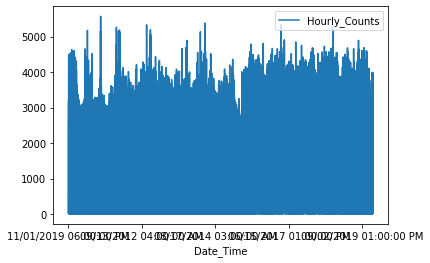

In [6]:
sensor_id = 1
datasensor = db[db['Sensor_ID']==sensor_id]
datasensor.plot('Date_Time', 'Hourly_Counts')

In [7]:
data = np.array(datasensor['Hourly_Counts'])

# 2. Wavelet Analysis

## 2.1 CWT - Continuous Wavelet Transform
Considering that the signal is continuous, this method provide a understand in whatever scale. For example, given that the Period of data sample is an hour, it is possible to see the influence in each week (168 hours = 24h * 7 days)

In [8]:
# Countinous Wavelet Transform (CWT) -- Families\n",
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

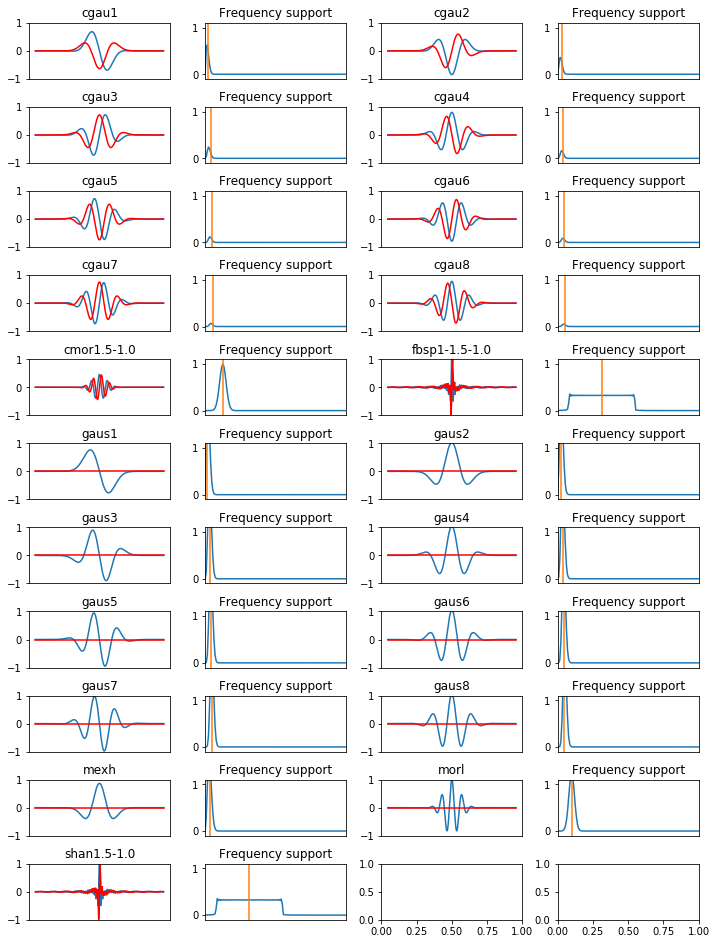

In [9]:
scg.plot_wavelets()

In [18]:
@jit
def testwave():
    scales = np.arange(1, 16, 1)
    scg.cws(data[:1500], wavelet='mexh', scales=scales)

Wall time: 776 ms


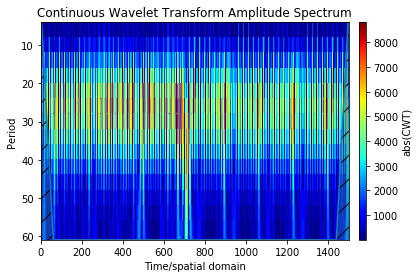

In [19]:
%time testwave()

In [ ]:

families = ['shan', 'cgau1', 'cmor', 'gaus1', 'mexh', 'morl']
for fwav in families:
    scg.cws(data[:24*30], wavelet=fwav, scales=scales, title=fwav)